In [1]:
%matplotlib inline
from clifford import Cl, randomMV
import numpy as np
from cmath import isclose
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
layout, blades = Cl(sig=[1,1])

In [3]:
def brot(n,v,multiparameter = 2):
    c = v + 0
    iterations = 0
    period = 0
    vold = v
    while iterations < n and abs(v) < 4:
        v = (v**multiparameter) + c
        iterations += 1
        temp = v + 0
        #if vold.round(9) == temp.round(9):
        if vold == temp:
            iterations = n
            break
            print("Broken with period",period,"!")
            
        
        period += 1
        if period > 20:
            period = 0
            vold = v + 0
    return iterations

In [4]:
def brottergetter():
    n = 200
    samples = 100000000
    #vectors = randomMV(layout, min=-2.0, max=2.0, n=samples, grades = [0,2])
    vectors = 4*(np.random.random(samples)+np.random.random(samples)*1j)-(2+2j)
    multi = np.random.random(samples)+2
    values = []
    for i in range(samples):
        values.append(brot(n,vectors[i],multi[i]))
        if i%(samples/20) == 0:
            print(i*100/samples,"%")
    print("100 %")
    return vectors, values, multi

In [478]:
blades

{'': 1, 'e1': (1^e1), 'e2': (1^e2), 'e12': (1^e12)}

In [479]:
((2.11+1j)*blades['e1'])[blades['e1']]

(2.11+1j)

In [5]:
vectors, values, multi = brottergetter()

0.0 %
5.0 %
10.0 %
15.0 %
20.0 %
25.0 %
30.0 %
35.0 %
40.0 %
45.0 %
50.0 %
55.0 %
60.0 %
65.0 %
70.0 %
75.0 %
80.0 %
85.0 %
90.0 %
95.0 %
100 %


In [6]:
x = []
y = []
z = []
c = []
for i in range(len(vectors)):
    if values[i]==200 and multi[i]>=2:
        x.append(vectors[i].real)
        y.append(vectors[i].imag)
        z.append(multi[i])
        if multi[i] <= 2.01:
            c.append((1,0,0))
        else:
            c.append((0,multi[i]-2,3-multi[i]))

In [383]:
x = []
y = []
z = []
w = []
for i in coolbois:
        x.append(i[blades['e1']])
        y.append(i[blades['e2']])
        z.append(i[blades['']])
        c=(i[blades['e1']]+2)/2
        if c<=1:
            w.append((1-c,c,0))
        else:
            w.append((0,2-c,c-1))

<ipython-input-383-d283c5e5b54a>:6: DeprecationWarning: Treating MultiVector objects like a sequence is deprecated. To access the coefficients as a sequence, use the `.value` attribute.
  x.append(i[blades['e1']])


IndexError: invalid index to scalar variable.

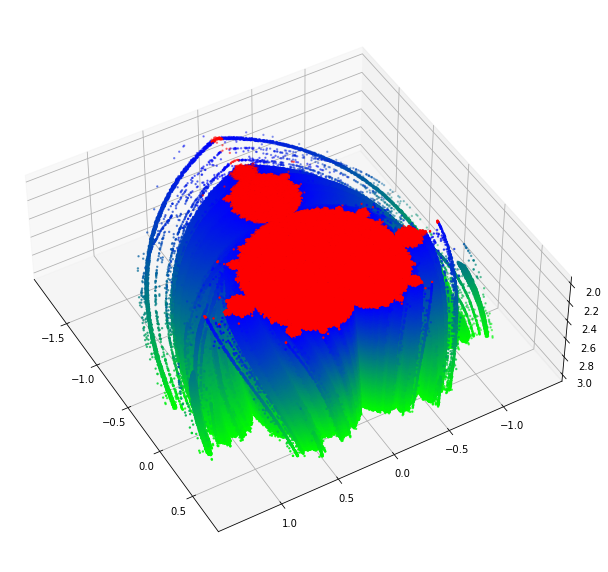

In [7]:
fig = plt.figure(figsize=[10,15])
ax = fig.gca(projection='3d')
ax.view_init(315,30)
ax.set_box_aspect((4,4,1.5))
ax.scatter(x,y,z, s=2, c=c)
plt.show()
#randomMV in 1

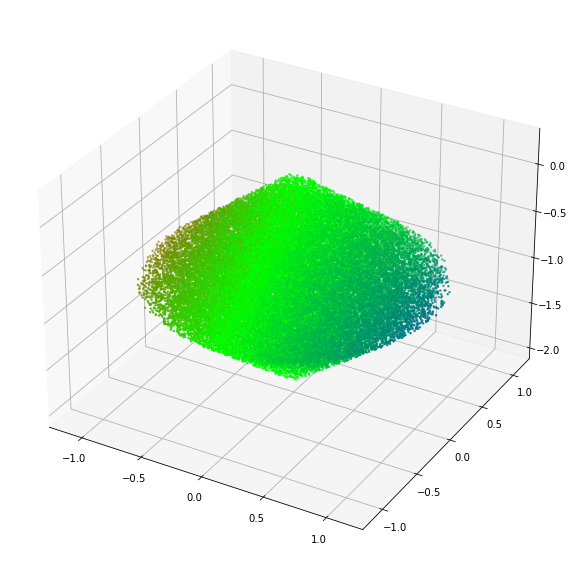

In [229]:
fig = plt.figure(figsize=[10,15])
ax = fig.gca(projection='3d')
ax.scatter(x,y,z, s=2,c=w)
plt.show()
#randomMV in 1,e1,e2

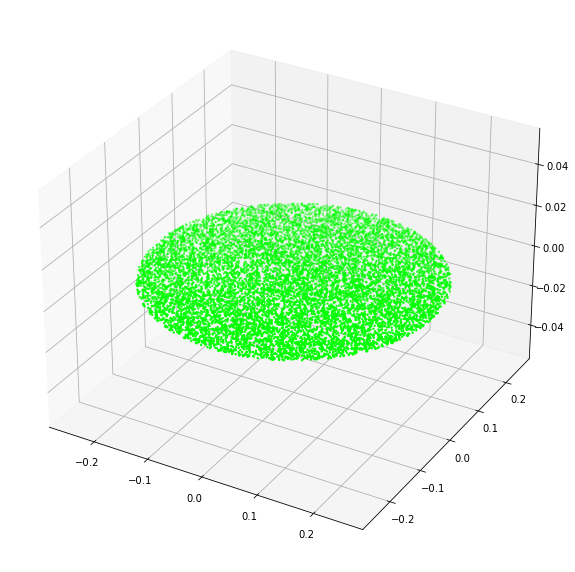

In [210]:
fig = plt.figure(figsize=[10,15])
ax = fig.gca(projection='3d')
ax.scatter(x,y,z, s=2,c=w)
plt.show()
#randomMV in e1,e2

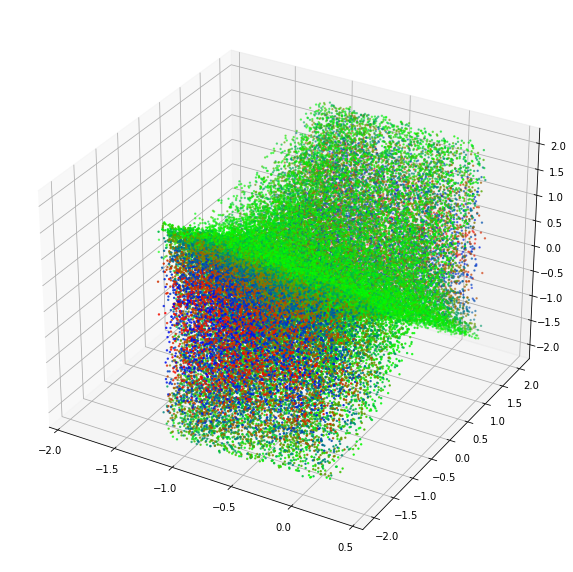

In [201]:
fig = plt.figure(figsize=[10,15])
ax = fig.gca(projection='3d')
ax.scatter(x,y,z, s=2,c=w)
plt.show()
#randomMV in all space, in order 1, e12, e1, e2 for xyzw

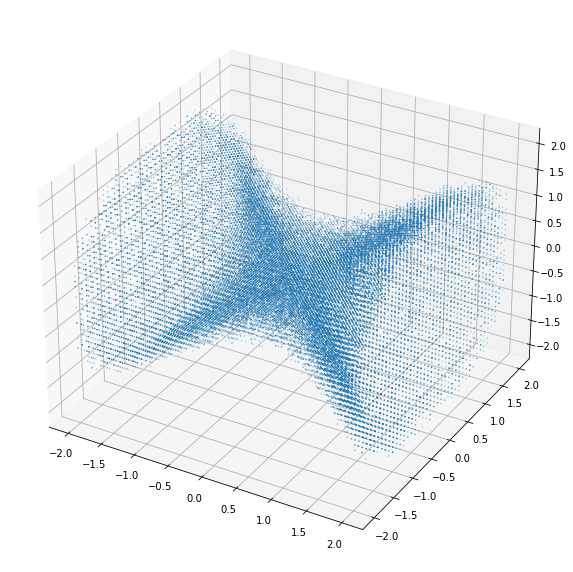

In [168]:
fig = plt.figure(figsize=[10,15])
ax = fig.gca(projection='3d')
ax.scatter(x,y,z, s=0.1)
plt.show()
#randomMV in all space, cant remember which angle, weirdly quantized.

In [301]:
v = coolbois[0]

In [349]:
v=(v*v)+coolbois[0]
v

0.22406 + (0.2029^e1) + (0.1346^e2)

In [354]:
brot(10000,v)

5

In [355]:
abs(v)

0.3308939481465262

In [394]:
multi

array([0.30203576, 0.52699032, 0.41137191, ..., 0.28616084, 0.16381136,
       0.51345062])

In [468]:
len(z)

1160078